## Uji Hipotesis - Model Prediksi BTC-USD 

In [1]:
# lib statistic 
import scipy.stats as sc

# lib manipulation dataset
import pandas as pd
import numpy as np

# lib data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# lib min-max scaler
from sklearn.preprocessing import MinMaxScaler

### Load Dataset

In [2]:
# load dataset
dataset = pd.read_excel("dataset/hasil_penelitian.xlsx", sheet_name="hasil evaluasi windows")
np.round(dataset[:5],3)

,LSTM-R,LSTM-MAE,LSTM-RMSE,LSTM-MAPE,LSTM-TIME,GRU-R,GRU-MAE,GRU-RMSE,GRU-MAPE,GRU-TIME
0,0.996,1082.83,1535.47,0.035,221.26,0.997,1314.78,2031.56,0.035,187.99
1,0.996,1091.48,1491.92,0.036,210.97,0.998,776.01,1171.66,0.023,190.84
2,0.996,1306.03,1594.93,0.047,215.56,0.998,1055.42,1534.85,0.030,186.80
3,0.996,1253.72,1644.21,0.043,207.76,0.997,683.48,1053.63,0.022,183.21
4,0.997,909.17,1456.14,0.026,217.82,0.998,729.81,1151.63,0.021,189.79


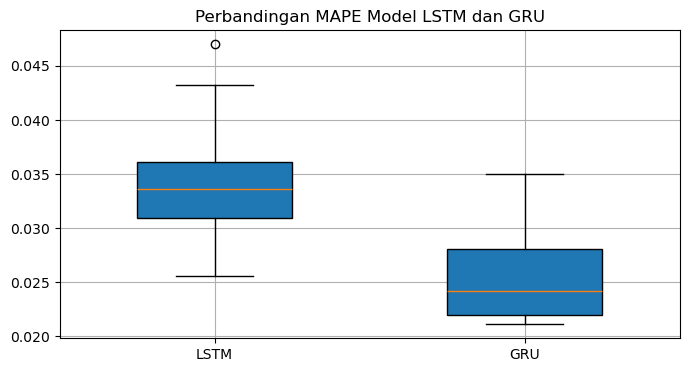

In [3]:
# define boxplot
fig, ax = plt.subplots(figsize=(8,4))
ax.boxplot(dataset[["LSTM-MAPE", "GRU-MAPE"]], labels=['LSTM', 'GRU'], patch_artist=True, widths=(0.5, 0.5))

# set labels
ax.set_title('Perbandingan MAPE Model LSTM dan GRU')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

# show boxplot
plt.show()

### Hypothesis Test of Non-parametric

- Normalize Min-Max Scaler

In [4]:
# min-max scaler
scaler = MinMaxScaler(feature_range=(0,1))

# process min-max 
LSTM_MAPE = scaler.fit_transform(np.array(dataset["LSTM-MAPE"]).reshape(-1,1))
GRU_MAPE = scaler.fit_transform(np.array(dataset["GRU-MAPE"]).reshape(-1,1))

- Normality Test with Shapiro-Wilk

In [5]:
# Hipotesa Awal
# H0 = Nilai R dan MAPE terdistribusi normal
# H2 = Nilai R dan MAPE TIDAK terdistribusi normal

# Interpretasi hasil:
# - p-value > 0.05: Data berdistribusi normal
# - p-value <= 0.05: Data tidak berdistribusi normal

In [6]:
print("Data tidak terdistribusi normal")
print("GRU-MAPE  :",np.round(sc.shapiro(GRU_MAPE).pvalue,2))
print("LSTM-MAPE :",np.round(sc.shapiro(LSTM_MAPE).pvalue,2))

Data tidak terdistribusi normal
GRU-MAPE  : 0.11
LSTM-MAPE : 0.53


- Mann-Whitney Test

In [7]:
# Hipotesa Awal
# H0 = Maetode GRU lebih baik dari Metode LSTM
# H1 = Maetode GRU TIDAK lebih baik dari Metode LSTM

# Interpretasi hasil:
# p-value < 0.05 = Terima H0
# p-value > 0.05 = Terima H1

In [8]:
# Mann-Whitney Test
MAPE = np.round(sc.mannwhitneyu(LSTM_MAPE, GRU_MAPE).pvalue,4)

# Intrepetasi hasil
if MAPE < 0.05:
  print("Karena p-value:",MAPE,"maka Terima H0")
else :
  print("Karena p-value:",MAPE,"maka Terima H1")

Karena p-value: [0.427] maka Terima H1


- Wilcoxon Rank Test

In [9]:
# Wilcoxon Rank Test
MAPE = np.round(sc.wilcoxon(LSTM_MAPE, GRU_MAPE).pvalue,4)

# Intrepetasi hasil
if MAPE < 0.05:
  print("Karena p-value:",MAPE,"maka Terima H0")
else :
  print("Karena p-value:",MAPE,"maka Terima H1")

Karena p-value: [0.3139] maka Terima H1


- Kruskal-Wallis Test

In [10]:
# Kruskal-Wallis Test
MAPE = np.round(sc.kruskal(LSTM_MAPE, GRU_MAPE).pvalue,4)

# Intrepetasi hasil
if MAPE < 0.05:
  print("Karena p-value:",MAPE,"maka Terima H0")
else :
  print("Karena p-value:",MAPE,"maka Terima H1")

Karena p-value: [0.4053] maka Terima H1
